In [1]:
#Aquacrop calibration and validation for wheat

In [1]:
import pandas as pd
import numpy as np

In [2]:
ds = pd.read_csv("C:\\Users\\HP PC\\Desktop\\Python_project\\calb.csv")

In [3]:
ds.head(10)

,Year,Treatment,Observed_Grain_Yield,Simulated_Grain_Yield
0,2014/15,Irrigate all growth stage,1.55,1.612
1,2014/15,Not irrigate Initial stage,1.90,1.580
2,2014/15,Not irrigate Development stage,1.14,1.147
3,2014/15,Not irrigate Mid-stage,0.82,0.678
4,2017/18,100% ETc,3.30,3.441
5,2017/18,75% ETc,2.91,3.267
6,2017/18,50% ETc,2.82,1.925
7,2018/19,100% ETc,4.01,3.524
8,2018/19,75% ETc,3.49,3.521
9,2018/19,50% ETc,3.19,2.656


In [4]:
ds.corr()

,Observed_Grain_Yield,Simulated_Grain_Yield
Observed_Grain_Yield,1.000000,0.939077
Simulated_Grain_Yield,0.939077,1.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

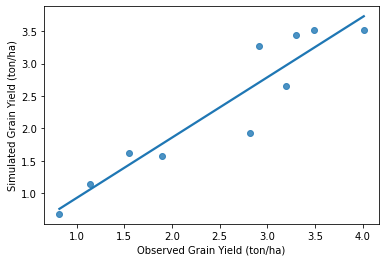

In [6]:
sns.regplot(x=ds.Observed_Grain_Yield,y=ds.Simulated_Grain_Yield, ci=None)
plt.ylabel('Simulated Grain Yield (ton/ha)')
plt.xlabel('Observed Grain Yield (ton/ha)')
plt.show()

In [7]:
vd = pd.read_csv("C:\\Users\\HP PC\\Desktop\\Python_project\\vald.csv")

In [8]:
vd.head()

,Year,Treatment,Observed_Grain_Yield,Simulated_Grain_Yield
0,2019/20,100% ETc,4.38,4.489
1,2019/20,75% ETc,4.07,4.485
2,2019/20,50% ETc,3.85,3.692


In [9]:
vd.corr()

,Observed_Grain_Yield,Simulated_Grain_Yield
Observed_Grain_Yield,1.000000,0.815635
Simulated_Grain_Yield,0.815635,1.000000


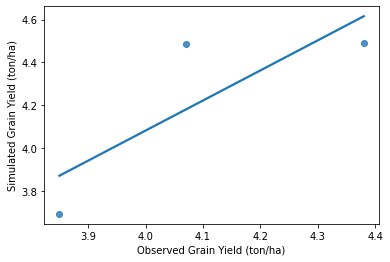

In [10]:
sns.regplot(x=vd.Observed_Grain_Yield,y=vd.Simulated_Grain_Yield, ci=None)
plt.ylabel('Simulated Grain Yield (ton/ha)')
plt.xlabel('Observed Grain Yield (ton/ha)')
plt.show()

In [11]:
#linear regression for validation period 

In [12]:
x=vd[['Observed_Grain_Yield']]

In [13]:
y=vd.Simulated_Grain_Yield

In [14]:
from sklearn import linear_model

In [15]:
model=linear_model.LinearRegression()

In [16]:
model.fit(x,y)

LinearRegression()

In [17]:
model.score(x,y)

0.665261120483089

In [18]:
#linear regression for calibration period 

In [19]:
x=ds[['Observed_Grain_Yield']]

In [20]:
y=ds.Simulated_Grain_Yield

In [21]:
from sklearn import linear_model

In [22]:
model=linear_model.LinearRegression()

In [23]:
model.fit(x,y)

LinearRegression()

In [24]:
model.score(x,y)

0.8818650915855271

<AxesSubplot:xlabel='Observed_Grain_Yield', ylabel='Simulated_Grain_Yield'>

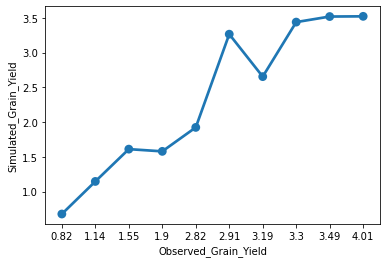

In [25]:
sns.pointplot(x=ds.Observed_Grain_Yield,y=ds.Simulated_Grain_Yield)

In [26]:
#plot

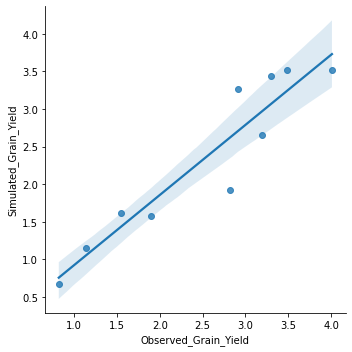

In [27]:
sns.lmplot(x="Observed_Grain_Yield", y="Simulated_Grain_Yield", data=ds)

In [28]:
#wheat with different scenario analysis

In [29]:
wheat = pd.read_csv("C:\\Users\\HP PC\\Desktop\\Python_project\\ALL_New.csv")

In [30]:
wheat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Geographic_location  972 non-null    object 
 1   Year                 972 non-null    object 
 2   Sowing_date          972 non-null    object 
 3   Seed_rate            972 non-null    object 
 4   Irrigation_methods   972 non-null    object 
 5   Irrigation_strategy  972 non-null    object 
 6   Combination          972 non-null    object 
 7   RunNr                972 non-null    object 
 8   Day1                 972 non-null    int64  
 9   Month1               972 non-null    int64  
 10  Year1                972 non-null    int64  
 11  Rain (mm)            972 non-null    float64
 12  ETo (mm)             972 non-null    float64
 13  GD (oC.day)          972 non-null    float64
 14  CO2 (ppm)            972 non-null    float64
 15  Irri (mm)            972 non-null    int

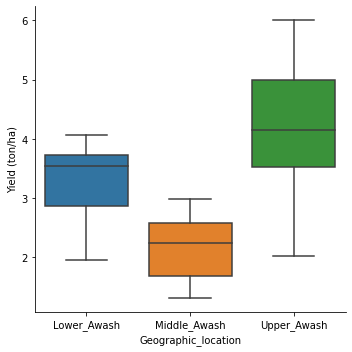

In [31]:
sns.catplot(data=wheat,x='Geographic_location',y='Yield (ton/ha)',kind='box')

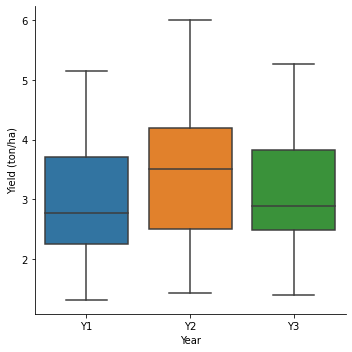

In [32]:
sns.catplot(data=wheat,x='Year',y='Yield (ton/ha)',kind='box')

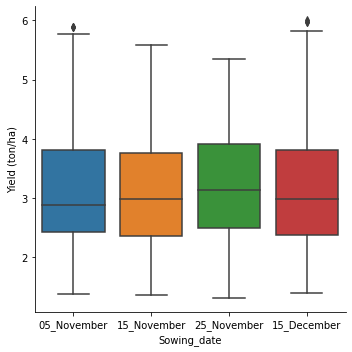

In [33]:
sns.catplot(data=wheat,x='Sowing_date',y='Yield (ton/ha)',kind='box')

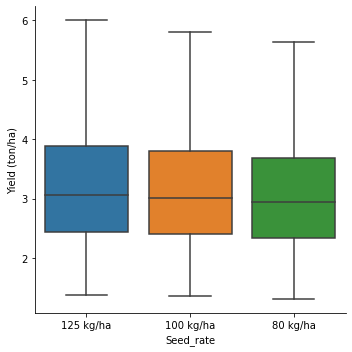

In [34]:
sns.catplot(data=wheat,x='Seed_rate',y='Yield (ton/ha)',kind='box')

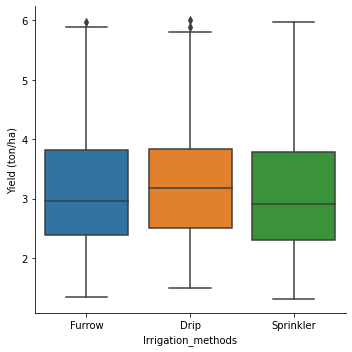

In [35]:
sns.catplot(data=wheat,x='Irrigation_methods',y='Yield (ton/ha)',kind='box')

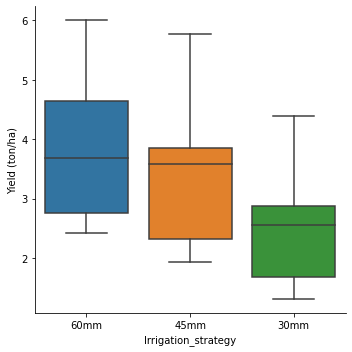

In [36]:
sns.catplot(data=wheat,x='Irrigation_strategy',y='Yield (ton/ha)',kind='box')

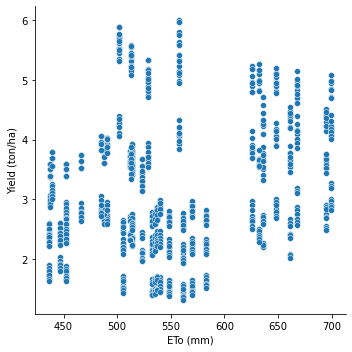

In [37]:
sns.relplot(data=wheat,x='ETo (mm)',y='Yield (ton/ha)',kind='scatter')

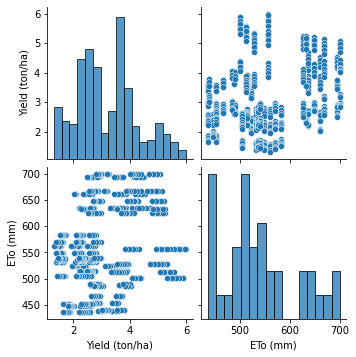

In [38]:
sns.pairplot(data=wheat[['Yield (ton/ha)','ETo (mm)']])

In [39]:
wheat.corr()

,Day1,Month1,Year1,Rain (mm),ETo (mm),GD (oC.day),CO2 (ppm),Irri (mm),Infilt (mm),Runoff (mm),...,ExpStr (%),StoStr (%),BioMass (ton/ha),Brelative (%),HI (%),Yield (ton/ha),WPet (kg/m3),DayN,MonthN,YearN
Day1,1.000000e+00,4.073901e-17,6.085743e-15,-3.557893e-02,5.948386e-02,2.225533e-02,3.295164e-16,-3.728545e-16,-0.004809,-0.072834,...,0.063753,0.026593,-0.048383,-0.039802,0.071587,0.011544,0.003689,-3.984642e-01,4.604801e-01,6.085743e-15
Month1,4.073901e-17,1.000000e+00,3.352761e-15,2.406558e-01,2.189487e-01,2.952852e-02,1.406945e-15,4.017905e-15,0.033084,0.078895,...,0.106989,0.013879,-0.098814,-0.050885,0.079979,-0.008657,-0.104962,-1.518275e-01,6.266340e-01,3.352761e-15
Year1,6.085743e-15,3.352761e-15,1.000000e+00,-1.183723e-01,-8.814607e-02,1.357676e-03,1.000000e+00,-2.491705e-13,-0.015864,-0.343134,...,-0.101314,-0.030035,0.118913,0.054827,-0.028445,0.050279,0.095003,-4.217646e-02,4.430971e-02,1.000000e+00
Rain (mm),-3.557893e-02,2.406558e-01,-1.183723e-01,1.000000e+00,2.326182e-03,3.617993e-01,-1.183723e-01,6.035119e-16,0.137566,0.260890,...,-0.199094,-0.079643,0.273889,0.110815,0.471269,0.416657,0.454628,8.973508e-02,2.362953e-01,-1.183723e-01
ETo (mm),5.948386e-02,2.189487e-01,-8.814607e-02,2.326182e-03,1.000000e+00,6.161779e-01,-8.814607e-02,1.446803e-15,0.000147,0.128764,...,0.239688,0.596989,-0.084042,-0.532565,0.416012,0.188892,0.076248,-3.927327e-02,5.338739e-01,-8.814607e-02
GD (oC.day),2.225533e-02,2.952852e-02,1.357676e-03,3.617993e-01,6.161779e-01,1.000000e+00,1.357676e-03,-1.017624e-16,0.050012,-0.084536,...,-0.327472,0.343741,0.406771,-0.189030,0.896015,0.723600,0.738001,-4.982601e-02,5.035756e-01,1.357676e-03
CO2 (ppm),3.295164e-16,1.406945e-15,1.000000e+00,-1.183723e-01,-8.814607e-02,1.357676e-03,1.000000e+00,-4.836532e-14,-0.015864,-0.343134,...,-0.101314,-0.030035,0.118913,0.054827,-0.028445,0.050279,0.095003,-4.217646e-02,4.430971e-02,1.000000e+00
Irri (mm),-3.728545e-16,4.017905e-15,-2.491705e-13,6.035119e-16,1.446803e-15,-1.017624e-16,-4.836532e-14,1.000000e+00,0.990492,0.038687,...,-0.642657,-0.693887,0.724038,0.730538,0.225056,0.508886,0.248332,9.519259e-17,9.224926e-17,-2.503550e-13
Infilt (mm),-4.808903e-03,3.308447e-02,-1.586365e-02,1.375664e-01,1.474587e-04,5.001234e-02,-1.586365e-02,9.904917e-01,1.000000,0.072956,...,-0.664262,-0.698324,0.755095,0.738968,0.287971,0.561644,0.308877,1.214847e-02,3.267085e-02,-1.586365e-02
Runoff (mm),-7.283402e-02,7.889518e-02,-3.431341e-01,2.608904e-01,1.287641e-01,-8.453557e-02,-3.431341e-01,3.868668e-02,0.072956,1.000000,...,0.166257,0.010601,-0.095978,-0.040510,-0.034309,-0.078856,-0.142714,1.690399e-01,-6.056825e-02,-3.431341e-01


<AxesSubplot:>

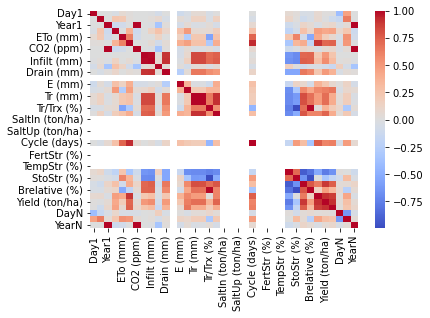

In [40]:
sns.heatmap(data=wheat.corr(),cmap='coolwarm')

In [41]:
wheat.columns

Index(['Geographic_location', 'Year', 'Sowing_date', 'Seed_rate',
       'Irrigation_methods', 'Irrigation_strategy', 'Combination', 'RunNr',
       'Day1', 'Month1', 'Year1', 'Rain (mm)', 'ETo (mm)', 'GD (oC.day)',
       'CO2 (ppm)', 'Irri (mm)', 'Infilt (mm)', 'Runoff (mm)', 'Drain (mm)',
       'Upflow (mm)', 'E (mm)', 'E/Ex (%)', 'Tr (mm)', 'TrW (mm)',
       'Tr/Trx (%)', 'ETa (mm)', 'SaltIn (ton/ha)', 'SaltOut (ton/ha)',
       'SaltUp (ton/ha)', 'SaltProf (ton/ha)', 'Cycle (days)', 'SaltStr (%)',
       'FertStr (%)', 'WeedStr (%)', 'TempStr (%)', 'ExpStr (%)', 'StoStr (%)',
       'BioMass (ton/ha)', 'Brelative (%)', 'HI (%)', 'Yield (ton/ha)',
       'WPet (kg/m3)', 'DayN', 'MonthN', 'YearN', 'Geo', 'Soil_Type'],
      dtype='object')

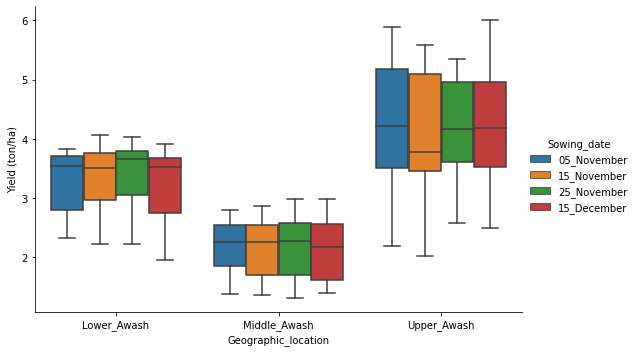

In [42]:
sns.catplot(data=wheat,x='Geographic_location',y='Yield (ton/ha)',kind='box',hue='Sowing_date',aspect=1.5)

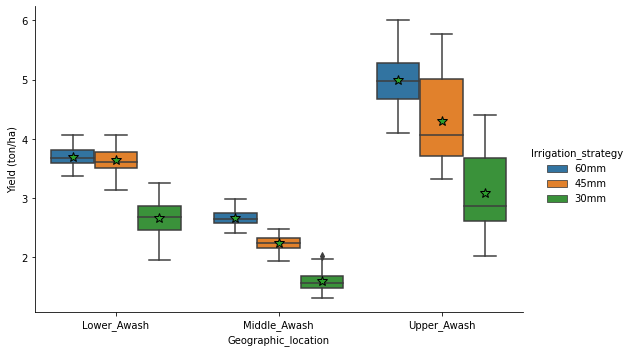

In [43]:
sns.catplot(data=wheat,x='Geographic_location',y='Yield (ton/ha)',kind='box',hue='Irrigation_strategy',aspect=1.5,showmeans=True,
            meanprops={"marker": "*",
                       "markeredgecolor": "black",
                       "markersize": "10"})

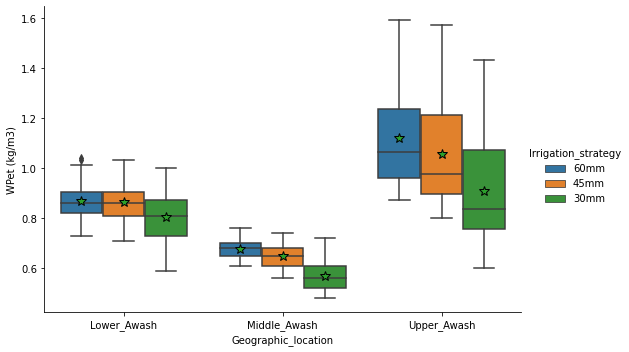

In [44]:
sns.catplot(data=wheat,x='Geographic_location',y='WPet (kg/m3)',kind='box',hue='Irrigation_strategy',aspect=1.5,showmeans=True,
            meanprops={"marker": "*",
                       "markeredgecolor": "black",
                       "markersize": "10"})

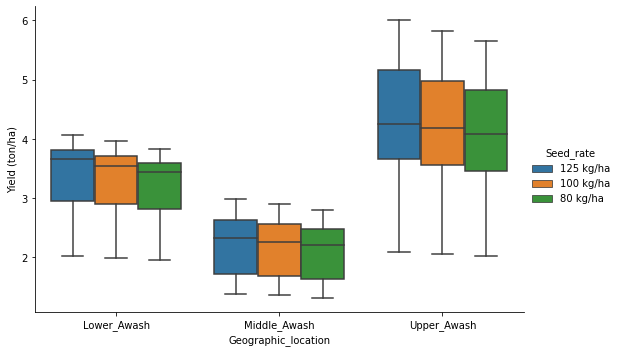

In [45]:
sns.catplot(data=wheat,x='Geographic_location',y='Yield (ton/ha)',kind='box',hue='Seed_rate',aspect=1.5)

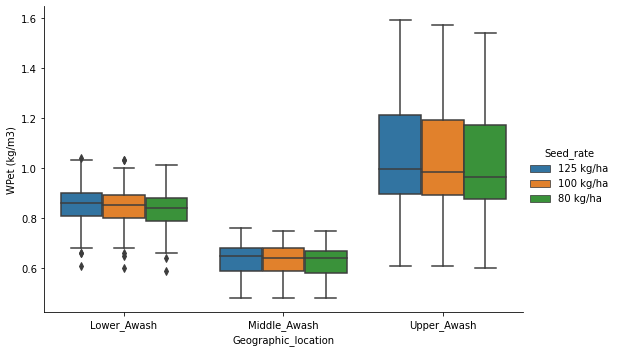

In [46]:
sns.catplot(data=wheat,x='Geographic_location',y='WPet (kg/m3)',kind='box',hue='Seed_rate',aspect=1.5)

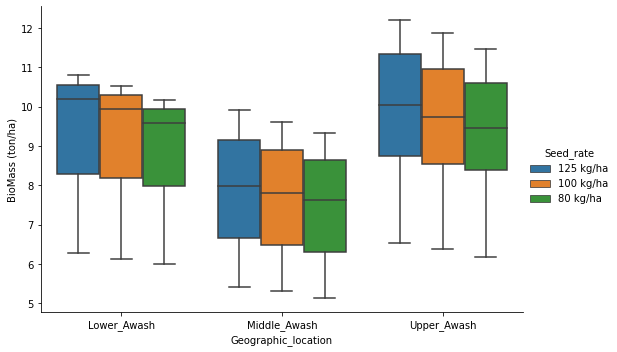

In [47]:
sns.catplot(data=wheat,x='Geographic_location',y='BioMass (ton/ha)',kind='box',hue='Seed_rate',aspect=1.5)

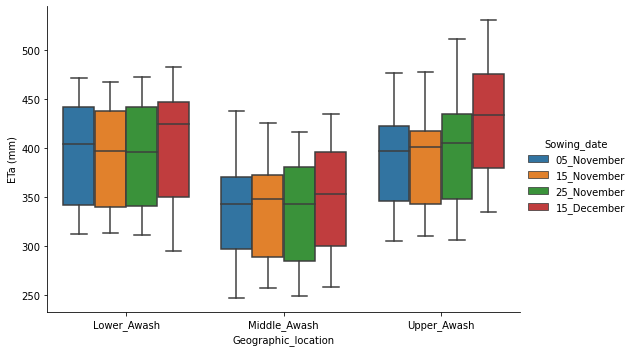

In [48]:
sns.catplot(data=wheat,x='Geographic_location',y='ETa (mm)',kind='box',hue='Sowing_date',aspect=1.5)

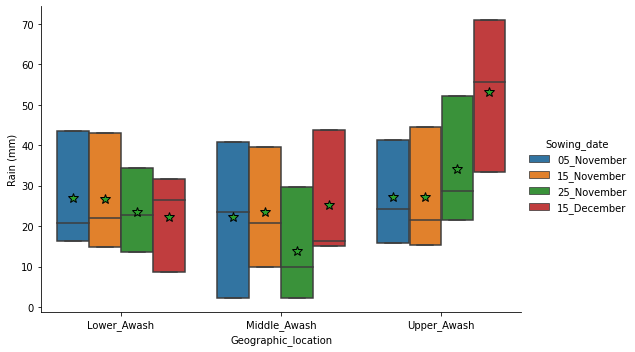

In [49]:
sns.catplot(data=wheat,x='Geographic_location',y='Rain (mm)',kind='box',hue='Sowing_date',aspect=1.5, showmeans=True,
            meanprops={"marker": "*",
                       "markeredgecolor": "black",
                       "markersize": "10"})

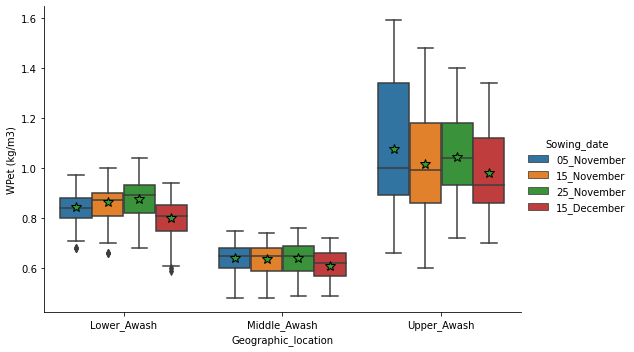

In [50]:
sns.catplot(data=wheat,x='Geographic_location',y='WPet (kg/m3)',kind='box',hue='Sowing_date',aspect=1.5, showmeans=True,
            meanprops={"marker": "*",
                       "markeredgecolor": "black",
                       "markersize": "10"})

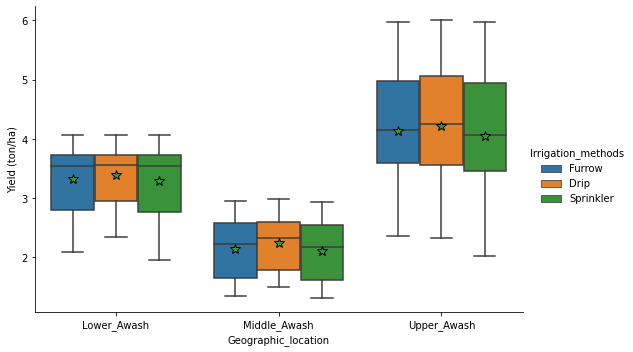

In [51]:
sns.catplot(data=wheat,x='Geographic_location',y='Yield (ton/ha)',kind='box',hue='Irrigation_methods',aspect=1.5, showmeans=True,
            meanprops={"marker": "*",
                       "markeredgecolor": "black",
                       "markersize": "10"})

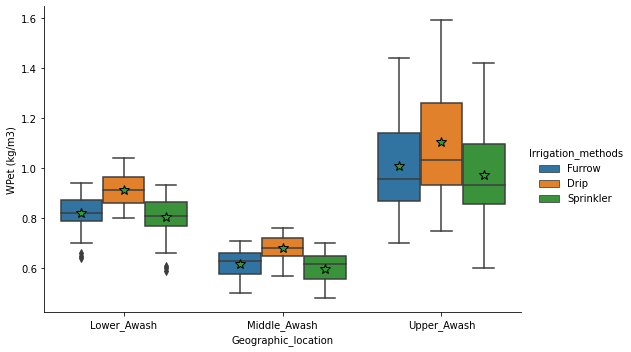

In [52]:
sns.catplot(data=wheat,x='Geographic_location',y='WPet (kg/m3)',kind='box',hue='Irrigation_methods',aspect=1.5,showmeans=True,
            meanprops={"marker": "*",
                       "markeredgecolor": "black",
                       "markersize": "10"})


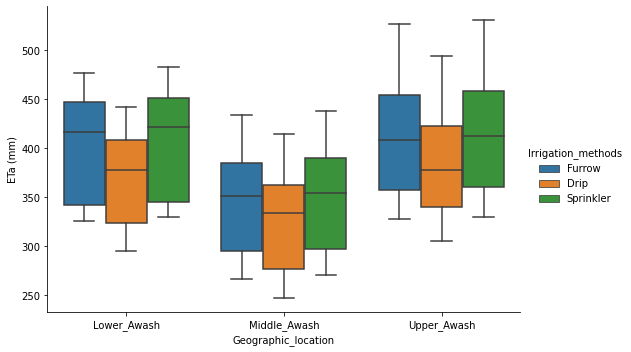

In [53]:
sns.catplot(data=wheat,x='Geographic_location',y='ETa (mm)',kind='box',hue='Irrigation_methods',aspect=1.5)
plt.savefig('IMETa', dpi=2000)

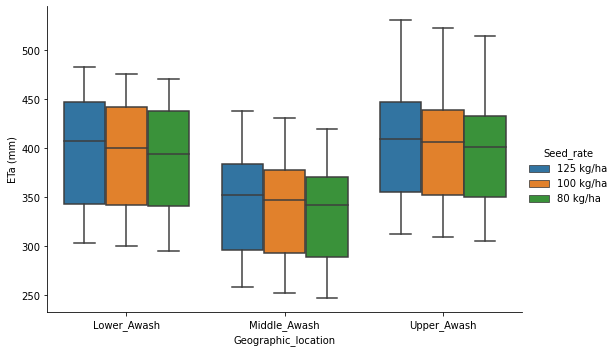

In [54]:
sns.catplot(data=wheat,x='Geographic_location',y='ETa (mm)',kind='box',hue='Seed_rate',aspect=1.5)

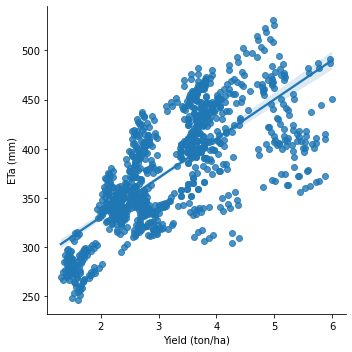

In [55]:
sns.lmplot(x="Yield (ton/ha)", y="ETa (mm)", data=wheat)

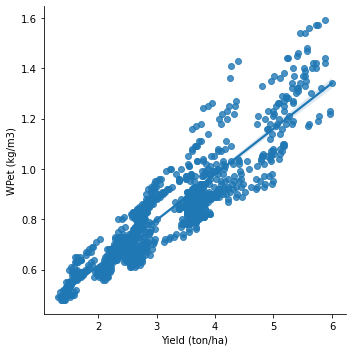

In [56]:
sns.lmplot(x="Yield (ton/ha)", y="WPet (kg/m3)", data=wheat)

In [57]:
results= wheat.groupby('Combination').mean()
results

,Day1,Month1,Year1,Rain (mm),ETo (mm),GD (oC.day),CO2 (ppm),Irri (mm),Infilt (mm),Runoff (mm),...,ExpStr (%),StoStr (%),BioMass (ton/ha),Brelative (%),HI (%),Yield (ton/ha),WPet (kg/m3),DayN,MonthN,YearN
Combination,,,,,,,,,,,,,,,,,,,,,
Y1:05_November:100 kg/ha:Drip:30mm,5.0,11.0,2018.0,18.633333,559.833333,1940.966667,409.21,270.0,288.533333,0.100000,...,24.666667,24.666667,7.130667,64.666667,32.033333,2.313000,0.750000,26.333333,1.333333,2019.0
Y1:05_November:100 kg/ha:Drip:45mm,5.0,11.0,2018.0,18.633333,559.833333,1940.966667,409.21,405.0,423.500000,0.133333,...,10.000000,11.333333,9.231333,84.000000,33.700000,3.141667,0.803333,26.333333,1.333333,2019.0
Y1:05_November:100 kg/ha:Drip:60mm,5.0,11.0,2018.0,18.633333,559.833333,1940.966667,409.21,540.0,558.500000,0.133333,...,5.000000,6.000000,10.087000,91.666667,34.933333,3.549667,0.836667,26.333333,1.333333,2019.0
Y1:05_November:100 kg/ha:Furrow:30mm,5.0,11.0,2018.0,18.633333,559.833333,1940.966667,409.21,270.0,288.533333,0.100000,...,27.333333,28.000000,6.598667,59.666667,32.700000,2.188000,0.673333,26.333333,1.333333,2019.0
Y1:05_November:100 kg/ha:Furrow:45mm,5.0,11.0,2018.0,18.633333,559.833333,1940.966667,409.21,405.0,423.500000,0.133333,...,12.000000,13.666667,8.901667,81.000000,35.533333,3.194000,0.776667,26.333333,1.333333,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y3:25_November:80 kg/ha:Furrow:45mm,25.0,11.0,2020.0,18.000000,559.300000,1945.833333,413.21,405.0,423.000000,0.000000,...,11.666667,12.333333,8.936000,82.000000,36.633333,3.309667,0.823333,17.666667,2.333333,2021.0
Y3:25_November:80 kg/ha:Furrow:60mm,25.0,11.0,2020.0,18.000000,559.300000,1945.833333,413.21,540.0,558.000000,0.000000,...,5.666667,6.000000,9.951333,90.666667,37.666667,3.786333,0.870000,17.666667,2.333333,2021.0
Y3:25_November:80 kg/ha:Sprinkler:30mm,25.0,11.0,2020.0,18.000000,559.300000,1945.833333,413.21,270.0,288.000000,0.000000,...,25.333333,27.333333,6.516333,59.666667,33.900000,2.243000,0.693333,17.666667,2.333333,2021.0


<AxesSubplot:>

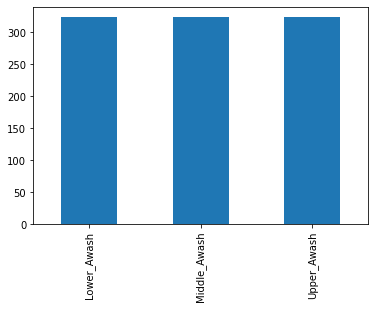

In [58]:
wheat['Geographic_location'].value_counts().plot(kind='bar')

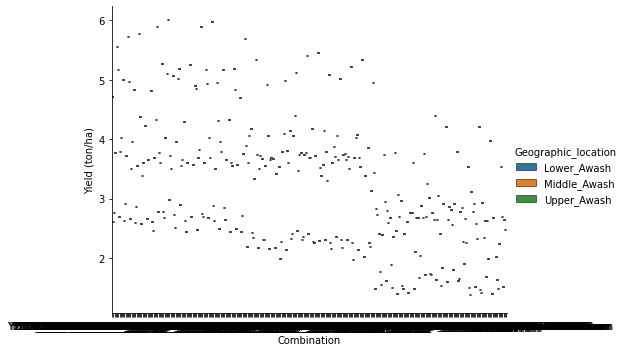

In [59]:
sns.catplot(data=wheat,x='Combination',y='Yield (ton/ha)',kind='box',hue='Geographic_location',aspect=1.5)

In [60]:
G1=wheat.groupby(['Combination', 'Geographic_location'])['Yield (ton/ha)'].mean()

In [61]:
G1.to_csv('G1.csv', index=True)

In [62]:
G2=wheat.groupby(['Sowing_date', 'Geographic_location'])['Yield (ton/ha)'].mean()
G2

Sowing_date  Geographic_location
05_November  Lower_Awash            3.307901
             Middle_Awash           2.174284
             Upper_Awash            4.177877
15_December  Lower_Awash            3.236951
             Middle_Awash           2.146259
             Upper_Awash            4.197469
15_November  Lower_Awash            3.366086
             Middle_Awash           2.168765
             Upper_Awash            3.974877
25_November  Lower_Awash            3.422963
             Middle_Awash           2.172235
             Upper_Awash            4.169790
Name: Yield (ton/ha), dtype: float64

In [63]:
G3=wheat.groupby(['Sowing_date', 'Geographic_location'])['WPet (kg/m3)'].mean()
G3

Sowing_date  Geographic_location
05_November  Lower_Awash            0.842099
             Middle_Awash           0.638519
             Upper_Awash            1.074815
15_December  Lower_Awash            0.799753
             Middle_Awash           0.608889
             Upper_Awash            0.979506
15_November  Lower_Awash            0.863210
             Middle_Awash           0.634321
             Upper_Awash            1.014074
25_November  Lower_Awash            0.877901
             Middle_Awash           0.640123
             Upper_Awash            1.044074
Name: WPet (kg/m3), dtype: float64

In [64]:
G4=wheat.groupby(['Seed_rate', 'Geographic_location'])['Yield (ton/ha)'].mean()
G4

Seed_rate  Geographic_location
100 kg/ha  Lower_Awash            3.337880
           Middle_Awash           2.165296
           Upper_Awash            4.131296
125 kg/ha  Lower_Awash            3.419444
           Middle_Awash           2.224991
           Upper_Awash            4.241056
80 kg/ha   Lower_Awash            3.243102
           Middle_Awash           2.105870
           Upper_Awash            4.017657
Name: Yield (ton/ha), dtype: float64

In [65]:
G5=wheat.groupby(['Seed_rate', 'Geographic_location'])['WPet (kg/m3)'].mean()
G5

Seed_rate  Geographic_location
100 kg/ha  Lower_Awash            0.846389
           Middle_Awash           0.630370
           Upper_Awash            1.028241
125 kg/ha  Lower_Awash            0.857222
           Middle_Awash           0.636759
           Upper_Awash            1.042315
80 kg/ha   Lower_Awash            0.833611
           Middle_Awash           0.624259
           Upper_Awash            1.013796
Name: WPet (kg/m3), dtype: float64

In [66]:
G6=wheat.groupby(['Irrigation_methods', 'Geographic_location'])['Yield (ton/ha)'].mean()
G6

Irrigation_methods  Geographic_location
Drip                Lower_Awash            3.391833
                    Middle_Awash           2.236324
                    Upper_Awash            4.211528
Furrow              Lower_Awash            3.315685
                    Middle_Awash           2.147361
                    Upper_Awash            4.134306
Sprinkler           Lower_Awash            3.292907
                    Middle_Awash           2.112472
                    Upper_Awash            4.044176
Name: Yield (ton/ha), dtype: float64

In [67]:
G7=wheat.groupby(['Irrigation_methods', 'Geographic_location'])['WPet (kg/m3)'].mean()
G7

Irrigation_methods  Geographic_location
Drip                Lower_Awash            0.912130
                    Middle_Awash           0.678981
                    Upper_Awash            1.104537
Furrow              Lower_Awash            0.820185
                    Middle_Awash           0.614444
                    Upper_Awash            1.007037
Sprinkler           Lower_Awash            0.804907
                    Middle_Awash           0.597963
                    Upper_Awash            0.972778
Name: WPet (kg/m3), dtype: float64

In [68]:
G8=wheat.groupby(['Irrigation_strategy', 'Geographic_location'])['Yield (ton/ha)'].mean()
G8

Irrigation_strategy  Geographic_location
30mm                 Lower_Awash            2.666750
                     Middle_Awash           1.594176
                     Upper_Awash            3.088463
45mm                 Lower_Awash            3.635167
                     Middle_Awash           2.239880
                     Upper_Awash            4.307000
60mm                 Lower_Awash            3.698509
                     Middle_Awash           2.662102
                     Upper_Awash            4.994546
Name: Yield (ton/ha), dtype: float64

In [69]:
G9=wheat.groupby(['Irrigation_strategy', 'Geographic_location'])['WPet (kg/m3)'].mean()
G9

Irrigation_strategy  Geographic_location
30mm                 Lower_Awash            0.803056
                     Middle_Awash           0.567593
                     Upper_Awash            0.907593
45mm                 Lower_Awash            0.864722
                     Middle_Awash           0.646852
                     Upper_Awash            1.056204
60mm                 Lower_Awash            0.869444
                     Middle_Awash           0.676944
                     Upper_Awash            1.120556
Name: WPet (kg/m3), dtype: float64

In [70]:
G10=wheat.groupby(['Irrigation_methods', 'Geographic_location'])['Yield (ton/ha)','WPet (kg/m3)'].mean()
G10

C:\Users\HPPC~1\AppData\Local\Temp/ipykernel_10408/365804627.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  G10=wheat.groupby(['Irrigation_methods', 'Geographic_location'])['Yield (ton/ha)','WPet (kg/m3)'].mean()


Yield (ton/ha)  WPet (kg/m3)
Irrigation_methods Geographic_location                              
Drip               Lower_Awash                3.391833      0.912130
                   Middle_Awash               2.236324      0.678981
                   Upper_Awash                4.211528      1.104537
Furrow             Lower_Awash                3.315685      0.820185
                   Middle_Awash               2.147361      0.614444
                   Upper_Awash                4.134306      1.007037
Sprinkler          Lower_Awash                3.292907      0.804907
                   Middle_Awash               2.112472      0.597963
                   Upper_Awash                4.044176      0.972778

In [71]:
G11=wheat.groupby(['Irrigation_strategy', 'Geographic_location'])['Yield (ton/ha)','WPet (kg/m3)'].mean()
G11

C:\Users\HPPC~1\AppData\Local\Temp/ipykernel_10408/377408899.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  G11=wheat.groupby(['Irrigation_strategy', 'Geographic_location'])['Yield (ton/ha)','WPet (kg/m3)'].mean()


Yield (ton/ha)  WPet (kg/m3)
Irrigation_strategy Geographic_location                              
30mm                Lower_Awash                2.666750      0.803056
                    Middle_Awash               1.594176      0.567593
                    Upper_Awash                3.088463      0.907593
45mm                Lower_Awash                3.635167      0.864722
                    Middle_Awash               2.239880      0.646852
                    Upper_Awash                4.307000      1.056204
60mm                Lower_Awash                3.698509      0.869444
                    Middle_Awash               2.662102      0.676944
                    Upper_Awash                4.994546      1.120556

In [72]:
##to save the data in to csv file
G1.to_csv('G1.csv', index=True)
G2.to_csv('G2.csv', index=True)
G3.to_csv('G3.csv', index=True)
G4.to_csv('G4.csv', index=True)
G5.to_csv('G5.csv', index=True)
G6.to_csv('G6.csv', index=True)
G7.to_csv('G7.csv', index=True)
G8.to_csv('G8.csv', index=True)
G9.to_csv('G9.csv', index=True)

In [73]:
G0=wheat.groupby(['Geographic_location', 'Combination'])['Yield (ton/ha)'].mean()
G0

Geographic_location  Combination                           
Lower_Awash          Y1:05_November:100 kg/ha:Drip:30mm        2.680
                     Y1:05_November:100 kg/ha:Drip:45mm        3.710
                     Y1:05_November:100 kg/ha:Drip:60mm        3.716
                     Y1:05_November:100 kg/ha:Furrow:30mm      2.415
                     Y1:05_November:100 kg/ha:Furrow:45mm      3.635
                                                               ...  
Upper_Awash          Y3:25_November:80 kg/ha:Furrow:45mm       3.916
                     Y3:25_November:80 kg/ha:Furrow:60mm       4.808
                     Y3:25_November:80 kg/ha:Sprinkler:30mm    2.686
                     Y3:25_November:80 kg/ha:Sprinkler:45mm    3.889
                     Y3:25_November:80 kg/ha:Sprinkler:60mm    4.781
Name: Yield (ton/ha), Length: 972, dtype: float64

In [74]:
G0.to_csv('G0.csv', index=True)

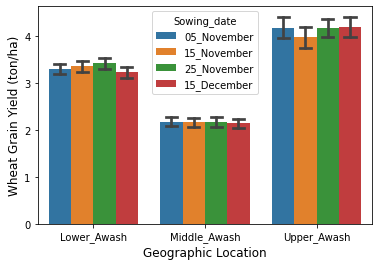

In [75]:
sd=sns.barplot(x="Geographic_location",y="Yield (ton/ha)",hue='Sowing_date', data=wheat, capsize=.1)
plt.ylabel('Wheat Grain Yield (ton/ha)', fontsize=12)
plt.xlabel('Geographic Location', fontsize=12)
plt.savefig('SDGY', dpi=2000)

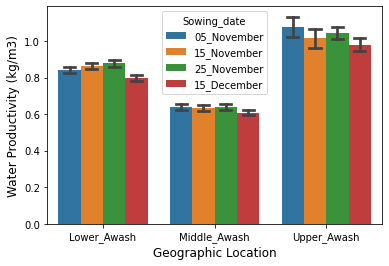

In [76]:
sd=sns.barplot(x="Geographic_location",y="WPet (kg/m3)",hue='Sowing_date', data=wheat, capsize=.1)
plt.ylabel('Water Productivity (kg/m3)', fontsize=12)
plt.xlabel('Geographic Location', fontsize=12)
plt.savefig('SDWP', dpi=2000)

Text(0.5, 0, 'Geographic Location')

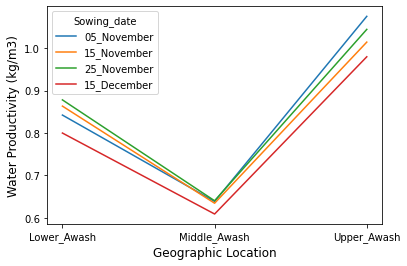

In [77]:
sd=sns.lineplot(x="Geographic_location",y="WPet (kg/m3)",hue='Sowing_date',ci=None, data=wheat)
plt.ylabel('Water Productivity (kg/m3)', fontsize=12)
plt.xlabel('Geographic Location', fontsize=12)

Text(0.5, 21.706249999999983, 'Geographic Location')

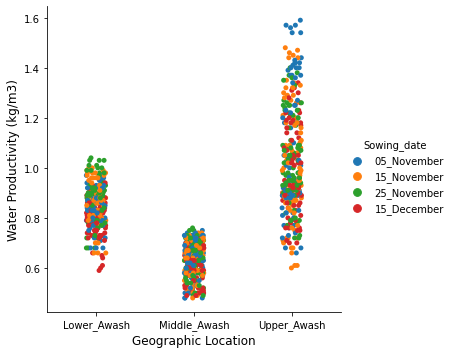

In [78]:
sd=sns.catplot(x="Geographic_location",y="WPet (kg/m3)",hue='Sowing_date', data=wheat)
plt.ylabel('Water Productivity (kg/m3)', fontsize=12)
plt.xlabel('Geographic Location', fontsize=12)

(array([0., 1., 2., 3., 4., 5.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

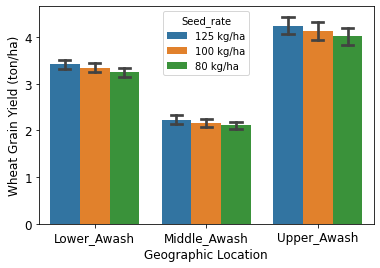

In [79]:

sr=sns.barplot(x="Geographic_location",y="Yield (ton/ha)",hue='Seed_rate', data=wheat, capsize=.1)
plt.ylabel('Wheat Grain Yield (ton/ha)', fontsize=12)
plt.xlabel('Geographic Location', fontsize=12)
plt.xticks(fontsize= 12) 
plt.yticks(fontsize= 12)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

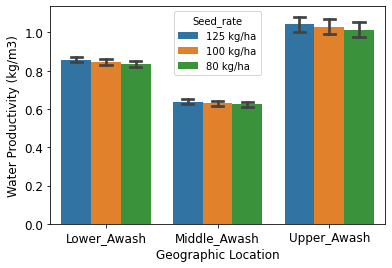

In [80]:
sr=sns.barplot(x="Geographic_location",y="WPet (kg/m3)",hue='Seed_rate', data=wheat, capsize=.1)
plt.ylabel('Water Productivity (kg/m3)', fontsize=12)
plt.xlabel('Geographic Location', fontsize=12)
plt.xticks(fontsize= 12) 
plt.yticks(fontsize= 12)

(array([0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

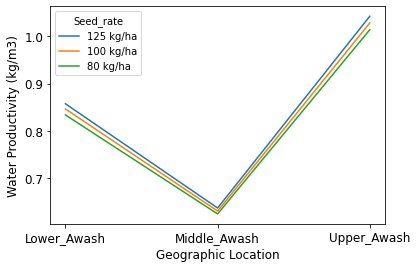

In [81]:
sr=sns.lineplot(x="Geographic_location",y="WPet (kg/m3)",hue='Seed_rate',ci=None, data=wheat)
plt.ylabel('Water Productivity (kg/m3)', fontsize=12)
plt.xlabel('Geographic Location', fontsize=12)
plt.xticks(fontsize= 12) 
plt.yticks(fontsize= 12)

(array([0., 1., 2., 3., 4., 5.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

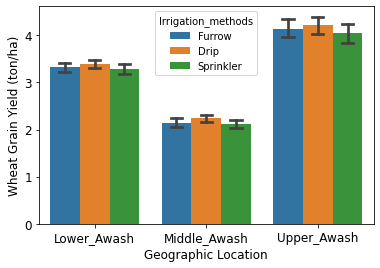

In [82]:
im=sns.barplot(x="Geographic_location",y="Yield (ton/ha)",hue='Irrigation_methods', data=wheat, capsize=.1)
plt.ylabel('Wheat Grain Yield (ton/ha)', fontsize=12)
plt.xlabel('Geographic Location', fontsize=12)
plt.xticks(fontsize= 12) 
plt.yticks(fontsize= 12)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

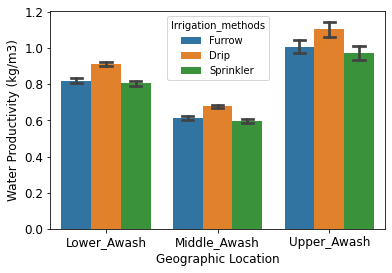

In [83]:
im=sns.barplot(x="Geographic_location",y="WPet (kg/m3)",hue='Irrigation_methods', data=wheat, capsize=.1)
plt.ylabel('Water Productivity (kg/m3)', fontsize=12)
plt.xlabel('Geographic Location', fontsize=12)
plt.xticks(fontsize= 12) 
plt.yticks(fontsize= 12)

(array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

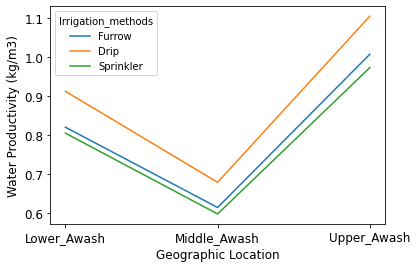

In [84]:
im=sns.lineplot(x="Geographic_location",y="WPet (kg/m3)",hue='Irrigation_methods', ci=None, data=wheat)
plt.ylabel('Water Productivity (kg/m3)', fontsize=12)
plt.xlabel('Geographic Location', fontsize=12)
plt.xticks(fontsize= 12) 
plt.yticks(fontsize= 12)

(array([0., 1., 2., 3., 4., 5., 6.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

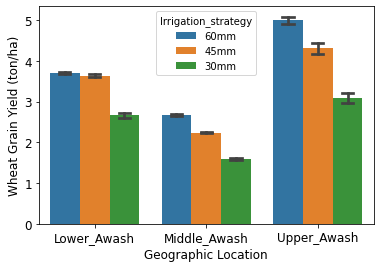

In [85]:
Is=sns.barplot(x="Geographic_location",y="Yield (ton/ha)",hue='Irrigation_strategy', data=wheat, capsize=.1)
plt.ylabel('Wheat Grain Yield (ton/ha)', fontsize=12)
plt.xlabel('Geographic Location', fontsize=12)
plt.xticks(fontsize= 12) 
plt.yticks(fontsize= 12)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

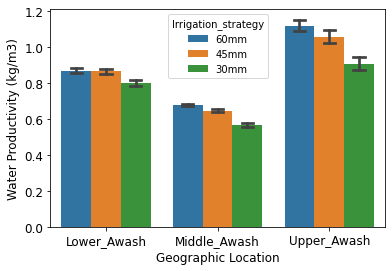

In [86]:
IS=sns.barplot(x="Geographic_location",y="WPet (kg/m3)",hue='Irrigation_strategy', data=wheat, capsize=.1)
plt.ylabel('Water Productivity (kg/m3)', fontsize=12)
plt.xlabel('Geographic Location', fontsize=12)
plt.xticks(fontsize= 12) 
plt.yticks(fontsize= 12)

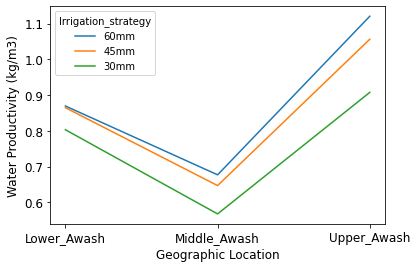

In [87]:
IS=sns.lineplot(x="Geographic_location",y="WPet (kg/m3)",hue='Irrigation_strategy',ci=None, data=wheat)
plt.ylabel('Water Productivity (kg/m3)', fontsize=12)
plt.xlabel('Geographic Location', fontsize=12)
plt.xticks(fontsize= 12) 
plt.yticks(fontsize= 12)
plt.savefig('ISWP1.png', dpi=2000)

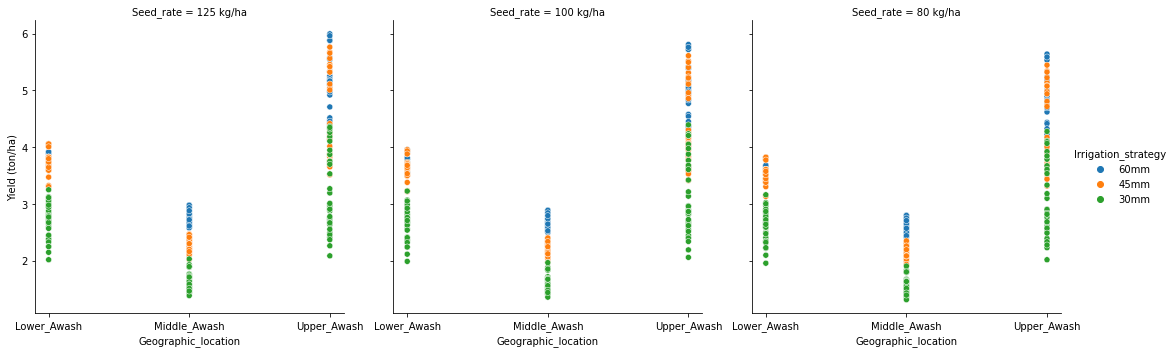

In [88]:
sns.relplot(data=wheat,x='Geographic_location',y='Yield (ton/ha)',hue='Irrigation_strategy',col='Seed_rate')

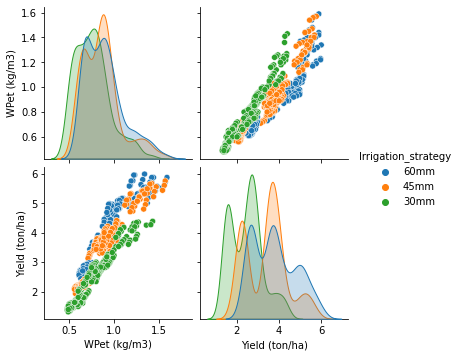

In [89]:
sns.pairplot(data=wheat[['WPet (kg/m3)','Yield (ton/ha)','Irrigation_strategy']],hue='Irrigation_strategy')
plt.savefig('GYWP', dpi=2000)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 42.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(array([0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

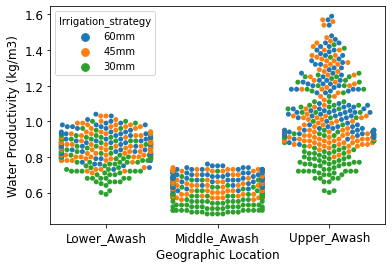

In [90]:
IS=sns.swarmplot(x="Geographic_location",y="WPet (kg/m3)",hue='Irrigation_strategy', data=wheat)
plt.ylabel('Water Productivity (kg/m3)', fontsize=12)
plt.xlabel('Geographic Location', fontsize=12)
plt.xticks(fontsize= 12) 
plt.yticks(fontsize= 12)

(array([0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

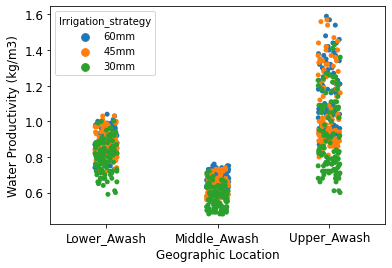

In [91]:
IS=sns.stripplot(x="Geographic_location",y="WPet (kg/m3)",hue='Irrigation_strategy', data=wheat)
plt.ylabel('Water Productivity (kg/m3)', fontsize=12)
plt.xlabel('Geographic Location', fontsize=12)
plt.xticks(fontsize= 12) 
plt.yticks(fontsize= 12)

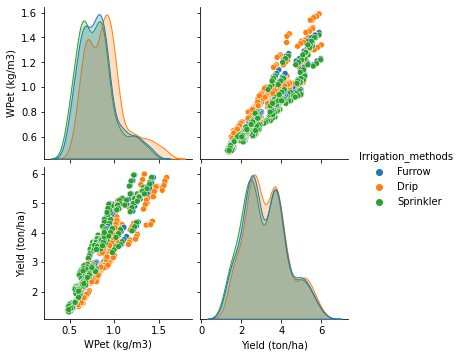

In [92]:
sns.pairplot(data=wheat[['WPet (kg/m3)','Yield (ton/ha)','Irrigation_methods']],hue='Irrigation_methods')

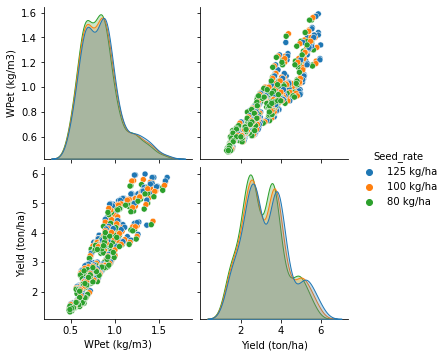

In [93]:
sns.pairplot(data=wheat[['WPet (kg/m3)','Yield (ton/ha)','Seed_rate']],hue='Seed_rate')

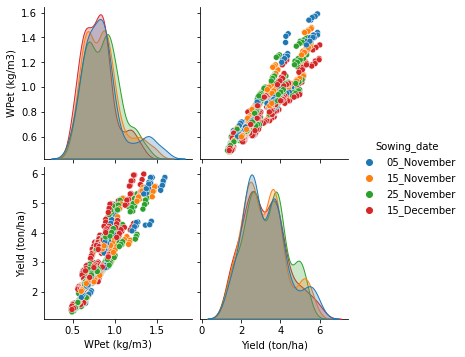

In [94]:
sns.pairplot(data=wheat[['WPet (kg/m3)','Yield (ton/ha)','Sowing_date']],hue='Sowing_date')

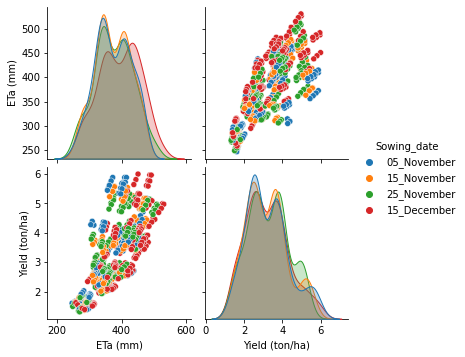

In [95]:
sns.pairplot(data=wheat[['ETa (mm)','Yield (ton/ha)','Sowing_date']],hue='Sowing_date')

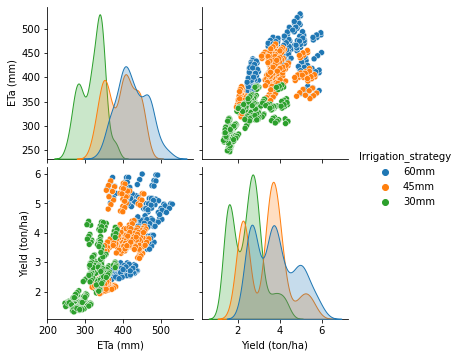

In [96]:
sns.pairplot(data=wheat[['ETa (mm)','Yield (ton/ha)','Irrigation_strategy']],hue='Irrigation_strategy')

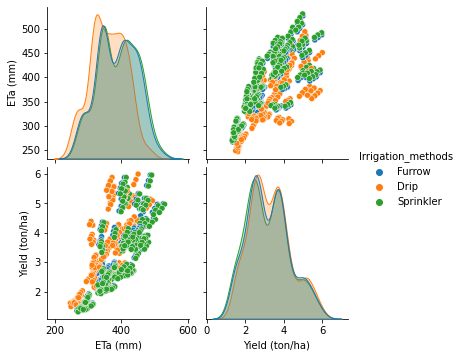

In [97]:
sns.pairplot(data=wheat[['ETa (mm)','Yield (ton/ha)','Irrigation_methods']],hue='Irrigation_methods')

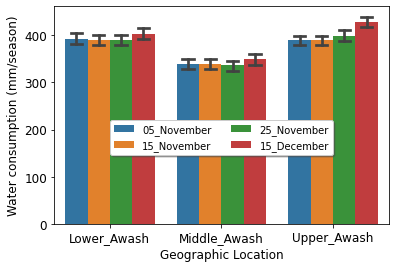

In [106]:
IS=sns.barplot(x="Geographic_location",y="ETa (mm)",hue='Sowing_date', data=wheat, capsize=.1)
plt.ylabel('Water consumption (mm/season)', fontsize=12)
plt.xlabel('Geographic Location', fontsize=12)
plt.xticks(fontsize= 12) 
plt.yticks(fontsize= 12)
IS.legend(loc='upper center', bbox_to_anchor=(0.5, 0.5), ncol=2, fancybox=True, shadow=True)

In [107]:
Gall=wheat.groupby(['Sowing_date','Seed_rate','Irrigation_methods','Irrigation_strategy','Geographic_location'])['Yield (ton/ha)','WPet (kg/m3)'].mean()
Gall

C:\Users\HPPC~1\AppData\Local\Temp/ipykernel_10408/1840912783.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Gall=wheat.groupby(['Sowing_date','Seed_rate','Irrigation_methods','Irrigation_strategy','Geographic_location'])['Yield (ton/ha)','WPet (kg/m3)'].mean()


Yield (ton/ha)  \
Sowing_date Seed_rate Irrigation_methods Irrigation_strategy Geographic_location                   
05_November 100 kg/ha Drip               30mm                Lower_Awash                2.808000   
                                                             Middle_Awash               1.741333   
                                                             Upper_Awash                3.311000   
                                         45mm                Lower_Awash                3.648667   
                                                             Middle_Awash               2.335000   
...                                                                                          ...   
25_November 80 kg/ha  Sprinkler          45mm                Middle_Awash               2.129667   
                                                             Upper_Awash                4.154333   
                                         60mm                Lower_Awash                3.668000   
                                                             Middle_Awash               2.581000   
                                                             Upper_Awash                4.798000   

                                                                                  WPet (kg/m3)  
Sowing_date Seed_rate Irrigation_methods Irrigation_strategy Geographic_location                
05_November 100 kg/ha Drip               30mm                Lower_Awash              0.876667  
                                                             Middle_Awash             0.646667  
                                                             Upper_Awash              1.050000  
                                         45mm                Lower_Awash              0.920000  
                                                             Middle_Awash             0.706667  
...                                                                                        ...  
25_November 80 kg/ha  Sprinkler          45mm                Middle_Awash             0.616667  
                                                             Upper_Awash              1.003333  
                                         60mm                Lower_Awash              0.850000  
                                                             Middle_Awash             0.660000  
                                                             Upper_Awash              1.056667  

[324 rows x 2 columns]

In [108]:
Gally=wheat.groupby(['Sowing_date','Seed_rate','Irrigation_methods','Irrigation_strategy','Geographic_location'])['Yield (ton/ha)'].mean()
Gally

Sowing_date  Seed_rate  Irrigation_methods  Irrigation_strategy  Geographic_location
05_November  100 kg/ha  Drip                30mm                 Lower_Awash            2.808000
                                                                 Middle_Awash           1.741333
                                                                 Upper_Awash            3.311000
                                            45mm                 Lower_Awash            3.648667
                                                                 Middle_Awash           2.335000
                                                                                          ...   
25_November  80 kg/ha   Sprinkler           45mm                 Middle_Awash           2.129667
                                                                 Upper_Awash            4.154333
                                            60mm                 Lower_Awash            3.668000
                                          

In [109]:
Gall.to_csv('Gall.csv', index=True)


In [110]:
sowing=wheat.groupby(['Sowing_date','Geographic_location'])['Irri (mm)','Rain (mm)','Runoff (mm)','Drain (mm)','Upflow (mm)','ETa (mm)','Yield (ton/ha)','WPet (kg/m3)'].mean()
sowing

C:\Users\HPPC~1\AppData\Local\Temp/ipykernel_10408/3832089461.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sowing=wheat.groupby(['Sowing_date','Geographic_location'])['Irri (mm)','Rain (mm)','Runoff (mm)','Drain (mm)','Upflow (mm)','ETa (mm)','Yield (ton/ha)','WPet (kg/m3)'].mean()


Irri (mm)  Rain (mm)  Runoff (mm)  \
Sowing_date Geographic_location                                      
05_November Lower_Awash              405.0  26.900000     0.029630   
            Middle_Awash             405.0  22.200000     0.100000   
            Upper_Awash              405.0  27.133333     0.000000   
15_December Lower_Awash              405.0  22.233333     0.000000   
            Middle_Awash             405.0  25.100000     0.000000   
            Upper_Awash              405.0  53.266667     0.233333   
15_November Lower_Awash              405.0  26.666667     0.037037   
            Middle_Awash             405.0  23.433333     0.250617   
            Upper_Awash              405.0  27.100000     0.000000   
25_November Lower_Awash              405.0  23.533333     0.022222   
            Middle_Awash             405.0  13.900000     0.011111   
            Upper_Awash              405.0  34.166667     0.003704   

                                 Drain (mm)  Upflow (mm)    ETa (mm)  \
Sowing_date Geographic_location                                        
05_November Lower_Awash           97.949383          0.0  392.928395   
            Middle_Awash         133.933333          0.0  338.760494   
            Upper_Awash          140.718519          0.0  389.209877   
15_December Lower_Awash          102.888889          0.0  403.739506   
            Middle_Awash         127.797531          0.0  349.419753   
            Upper_Awash          125.976543          0.0  428.117284   
15_November Lower_Awash          104.797531          0.0  389.701235   
            Middle_Awash         136.123457          0.0  339.016049   
            Upper_Awash          140.759259          0.0  389.235802   
25_November Lower_Awash          106.274074          0.0  389.824691   
            Middle_Awash         132.564198          0.0  336.200000   
            Upper_Awash          135.190123          0.0  399.500000   

                                 Yield (ton/ha)  WPet (kg/m3)  
Sowing_date Geographic_location                                
05_November Lower_Awash                3.307901      0.842099  
            Middle_Awash               2.174284      0.638519  
            Upper_Awash                4.177877      1.074815  
15_December Lower_Awash                3.236951      0.799753  
            Middle_Awash               2.146259      0.608889  
            Upper_Awash                4.197469      0.979506  
15_November Lower_Awash                3.366086      0.863210  
            Middle_Awash               2.168765      0.634321  
            Upper_Awash                3.974877      1.014074  
25_November Lower_Awash                3.422963      0.877901  
            Middle_Awash               2.172235      0.640123  
            Upper_Awash                4.169790      1.044074

In [111]:
seed=wheat.groupby(['Seed_rate','Geographic_location'])['Irri (mm)','Rain (mm)','Runoff (mm)','Drain (mm)','Upflow (mm)','ETa (mm)','Yield (ton/ha)','WPet (kg/m3)'].mean()
seed

C:\Users\HPPC~1\AppData\Local\Temp/ipykernel_10408/3081047582.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  seed=wheat.groupby(['Seed_rate','Geographic_location'])['Irri (mm)','Rain (mm)','Runoff (mm)','Drain (mm)','Upflow (mm)','ETa (mm)','Yield (ton/ha)','WPet (kg/m3)'].mean()


Irri (mm)  Rain (mm)  Runoff (mm)  Drain (mm)  \
Seed_rate Geographic_location                                                  
100 kg/ha Lower_Awash              405.0  24.833333     0.022222  102.899074   
          Middle_Awash             405.0  21.158333     0.091667  132.337963   
          Upper_Awash              405.0  35.416667     0.059259  135.550926   
125 kg/ha Lower_Awash              405.0  24.833333     0.022222   98.793519   
          Middle_Awash             405.0  21.158333     0.085185  127.012963   
          Upper_Awash              405.0  35.416667     0.059259  130.787037   
80 kg/ha  Lower_Awash              405.0  24.833333     0.022222  107.239815   
          Middle_Awash             405.0  21.158333     0.094444  138.462963   
          Upper_Awash              405.0  35.416667     0.059259  140.645370   

                               Upflow (mm)    ETa (mm)  Yield (ton/ha)  \
Seed_rate Geographic_location                                            
100 kg/ha Lower_Awash                  0.0  394.194444        3.337880   
          Middle_Awash                 0.0  341.109259        2.165296   
          Upper_Awash                  0.0  401.638889        4.131296   
125 kg/ha Lower_Awash                  0.0  398.560185        3.419444   
          Middle_Awash                 0.0  346.485185        2.224991   
          Upper_Awash                  0.0  406.451852        4.241056   
80 kg/ha  Lower_Awash                  0.0  389.390741        3.243102   
          Middle_Awash                 0.0  334.952778        2.105870   
          Upper_Awash                  0.0  396.456481        4.017657   

                               WPet (kg/m3)  
Seed_rate Geographic_location                
100 kg/ha Lower_Awash              0.846389  
          Middle_Awash             0.630370  
          Upper_Awash              1.028241  
125 kg/ha Lower_Awash              0.857222  
          Middle_Awash             0.636759  
          Upper_Awash              1.042315  
80 kg/ha  Lower_Awash              0.833611  
          Middle_Awash             0.624259  
          Upper_Awash              1.013796

In [112]:
IM=wheat.groupby(['Irrigation_methods','Geographic_location'])['Irri (mm)','Rain (mm)','Runoff (mm)','Drain (mm)','Upflow (mm)','E (mm)', 'Tr (mm)','ETa (mm)','Yield (ton/ha)','WPet (kg/m3)'].mean()
IM

C:\Users\HPPC~1\AppData\Local\Temp/ipykernel_10408/2653883955.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  IM=wheat.groupby(['Irrigation_methods','Geographic_location'])['Irri (mm)','Rain (mm)','Runoff (mm)','Drain (mm)','Upflow (mm)','E (mm)', 'Tr (mm)','ETa (mm)','Yield (ton/ha)','WPet (kg/m3)'].mean()


Irri (mm)  Rain (mm)  Runoff (mm)  \
Irrigation_methods Geographic_location                                      
Drip               Lower_Awash              405.0  24.833333     0.033333   
                   Middle_Awash             405.0  21.158333     0.106481   
                   Upper_Awash              405.0  35.416667     0.061111   
Furrow             Lower_Awash              405.0  24.833333     0.016667   
                   Middle_Awash             405.0  21.158333     0.084259   
                   Upper_Awash              405.0  35.416667     0.058333   
Sprinkler          Lower_Awash              405.0  24.833333     0.016667   
                   Middle_Awash             405.0  21.158333     0.080556   
                   Upper_Awash              405.0  35.416667     0.058333   

                                        Drain (mm)  Upflow (mm)     E (mm)  \
Irrigation_methods Geographic_location                                       
Drip               Lower_Awash          122.295370          0.0  48.129630   
                   Middle_Awash         145.212963          0.0  31.407407   
                   Upper_Awash          155.865741          0.0  49.041667   
Furrow             Lower_Awash           95.156481          0.0  86.526852   
                   Middle_Awash         127.737963          0.0  61.169444   
                   Upper_Awash          127.606481          0.0  89.604630   
Sprinkler          Lower_Awash           91.480556          0.0  92.832407   
                   Middle_Awash         124.862963          0.0  68.480556   
                   Upper_Awash          123.511111          0.0  97.920370   

                                           Tr (mm)    ETa (mm)  \
Irrigation_methods Geographic_location                           
Drip               Lower_Awash          323.431481  371.561111   
                   Middle_Awash         295.867593  327.275000   
                   Upper_Awash          332.568519  381.610185   
Furrow             Lower_Awash          316.472222  402.999074   
                   Middle_Awash         284.776852  345.946296   
                   Upper_Awash          319.791667  409.396296   
Sprinkler          Lower_Awash          314.752778  407.585185   
                   Middle_Awash         280.845370  349.325926   
                   Upper_Awash          315.620370  413.540741   

                                        Yield (ton/ha)  WPet (kg/m3)  
Irrigation_methods Geographic_location                                
Drip               Lower_Awash                3.391833      0.912130  
                   Middle_Awash               2.236324      0.678981  
                   Upper_Awash                4.211528      1.104537  
Furrow             Lower_Awash                3.315685      0.820185  
                   Middle_Awash               2.147361      0.614444  
                   Upper_Awash                4.134306      1.007037  
Sprinkler          Lower_Awash                3.292907      0.804907  
                   Middle_Awash               2.112472      0.597963  
                   Upper_Awash                4.044176      0.972778

In [113]:
IS=wheat.groupby(['Irrigation_strategy','Geographic_location'])['Irri (mm)','Rain (mm)','Runoff (mm)','Drain (mm)','Upflow (mm)','ETa (mm)','Yield (ton/ha)','WPet (kg/m3)'].mean()
IS

C:\Users\HPPC~1\AppData\Local\Temp/ipykernel_10408/1071742549.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  IS=wheat.groupby(['Irrigation_strategy','Geographic_location'])['Irri (mm)','Rain (mm)','Runoff (mm)','Drain (mm)','Upflow (mm)','ETa (mm)','Yield (ton/ha)','WPet (kg/m3)'].mean()


Irri (mm)  Rain (mm)  Runoff (mm)  \
Irrigation_strategy Geographic_location                                      
30mm                Lower_Awash              270.0  24.833333     0.000000   
                    Middle_Awash             270.0  21.158333     0.084259   
                    Upper_Awash              270.0  35.416667     0.061111   
45mm                Lower_Awash              405.0  24.833333     0.033333   
                    Middle_Awash             405.0  21.158333     0.090741   
                    Upper_Awash              405.0  35.416667     0.058333   
60mm                Lower_Awash              540.0  24.833333     0.033333   
                    Middle_Awash             540.0  21.158333     0.096296   
                    Upper_Awash              540.0  35.416667     0.058333   

                                         Drain (mm)  Upflow (mm)    ETa (mm)  \
Irrigation_strategy Geographic_location                                        
30mm                Lower_Awash           47.517593          0.0  332.544444   
                    Middle_Awash          66.177778          0.0  281.449074   
                    Upper_Awash           60.777778          0.0  341.763889   
45mm                Lower_Awash           89.815741          0.0  422.231481   
                    Middle_Awash         128.459259          0.0  347.044444   
                    Upper_Awash          126.632407          0.0  410.655556   
60mm                Lower_Awash          171.599074          0.0  427.369444   
                    Middle_Awash         203.176852          0.0  394.053704   
                    Upper_Awash          219.573148          0.0  452.127778   

                                         Yield (ton/ha)  WPet (kg/m3)  
Irrigation_strategy Geographic_location                                
30mm                Lower_Awash                2.666750      0.803056  
                    Middle_Awash               1.594176      0.567593  
                    Upper_Awash                3.088463      0.907593  
45mm                Lower_Awash                3.635167      0.864722  
                    Middle_Awash               2.239880      0.646852  
                    Upper_Awash                4.307000      1.056204  
60mm                Lower_Awash                3.698509      0.869444  
                    Middle_Awash               2.662102      0.676944  
                    Upper_Awash                4.994546      1.120556

In [114]:
all=wheat.groupby(['Sowing_date','Seed_rate','Irrigation_methods','Irrigation_strategy','Geographic_location'])['Irri (mm)','Rain (mm)','Runoff (mm)','Drain (mm)','ETa (mm)','Yield (ton/ha)','WPet (kg/m3)'].mean()
all

C:\Users\HPPC~1\AppData\Local\Temp/ipykernel_10408/3416650347.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  all=wheat.groupby(['Sowing_date','Seed_rate','Irrigation_methods','Irrigation_strategy','Geographic_location'])['Irri (mm)','Rain (mm)','Runoff (mm)','Drain (mm)','ETa (mm)','Yield (ton/ha)','WPet (kg/m3)'].mean()


Irri (mm)  \
Sowing_date Seed_rate Irrigation_methods Irrigation_strategy Geographic_location              
05_November 100 kg/ha Drip               30mm                Lower_Awash              270.0   
                                                             Middle_Awash             270.0   
                                                             Upper_Awash              270.0   
                                         45mm                Lower_Awash              405.0   
                                                             Middle_Awash             405.0   
...                                                                                     ...   
25_November 80 kg/ha  Sprinkler          45mm                Middle_Awash             405.0   
                                                             Upper_Awash              405.0   
                                         60mm                Lower_Awash              540.0   
                                                             Middle_Awash             540.0   
                                                             Upper_Awash              540.0   

                                                                                  Rain (mm)  \
Sowing_date Seed_rate Irrigation_methods Irrigation_strategy Geographic_location              
05_November 100 kg/ha Drip               30mm                Lower_Awash          26.900000   
                                                             Middle_Awash         22.200000   
                                                             Upper_Awash          27.133333   
                                         45mm                Lower_Awash          26.900000   
                                                             Middle_Awash         22.200000   
...                                                                                     ...   
25_November 80 kg/ha  Sprinkler          45mm                Middle_Awash         13.900000   
                                                             Upper_Awash          34.166667   
                                         60mm                Lower_Awash          23.533333   
                                                             Middle_Awash         13.900000   
                                                             Upper_Awash          34.166667   

                                                                                  Runoff (mm)  \
Sowing_date Seed_rate Irrigation_methods Irrigation_strategy Geographic_location                
05_November 100 kg/ha Drip               30mm                Lower_Awash             0.000000   
                                                             Middle_Awash            0.100000   
                                                             Upper_Awash             0.000000   
                                         45mm                Lower_Awash             0.066667   
                                                             Middle_Awash            0.100000   
...                                                                                       ...   
25_November 80 kg/ha  Sprinkler          45mm                Middle_Awash            0.000000   
                                                             Upper_Awash             0.000000   
                                         60mm                Lower_Awash             0.033333   
                                                             Middle_Awash            0.033333   
                                                             Upper_Awash             0.000000   

                                                                                  Drain (mm)  \
Sowing_date Seed_rate Irrigation_methods Irrigation_strategy Geographic_location               
05_November 100 kg/ha Drip               30mm                Lower_Awash           56.600000   
                                                            

In [115]:
all.to_csv('all.csv', index=True)

<AxesSubplot:>

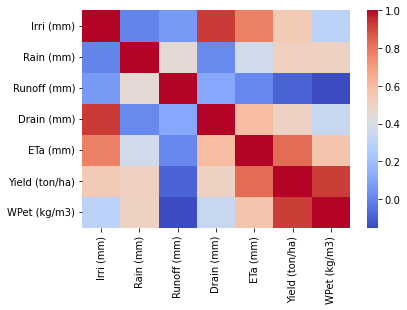

In [116]:
sns.heatmap(data=all.corr(),cmap='coolwarm')

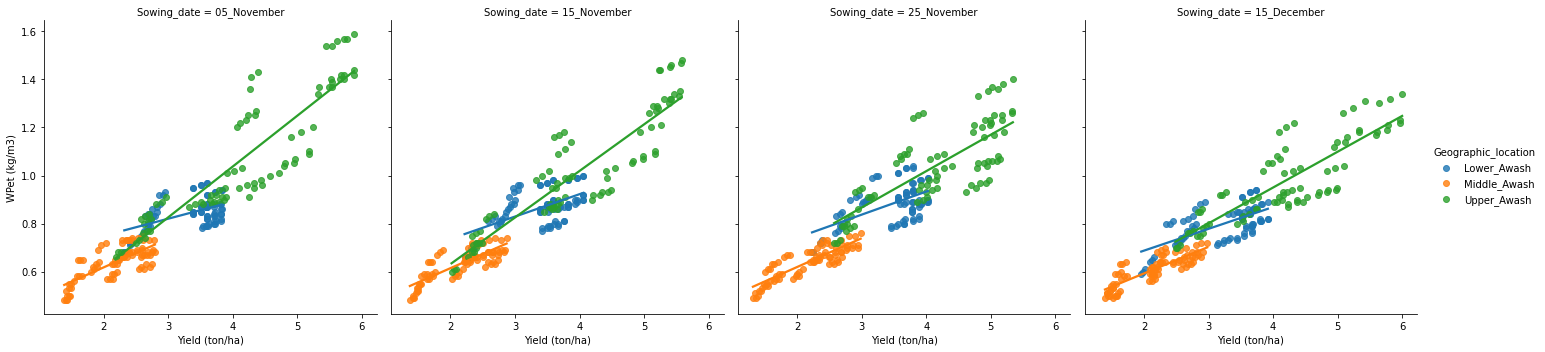

In [117]:
sns.lmplot(x="Yield (ton/ha)", y="WPet (kg/m3)", col="Sowing_date", ci=None, hue="Geographic_location", data=wheat);



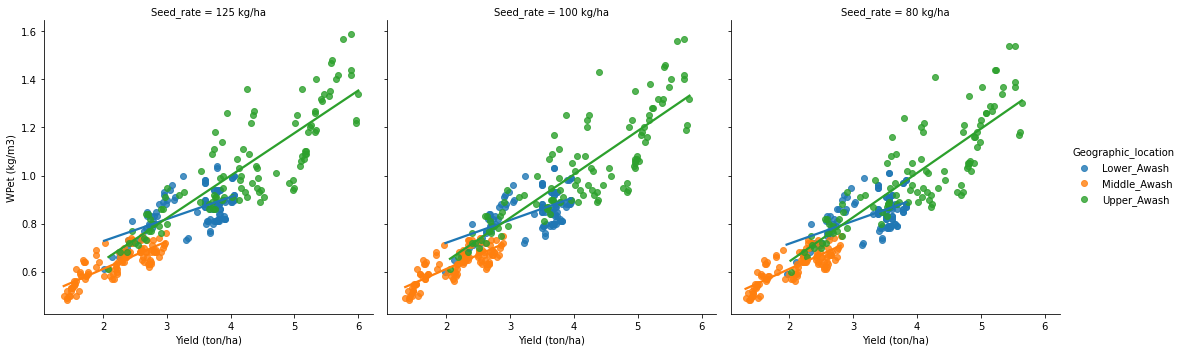

In [118]:
sns.lmplot(x="Yield (ton/ha)", y="WPet (kg/m3)", col="Seed_rate", ci=None, hue="Geographic_location", data=wheat);
plt.savefig('foo.png')

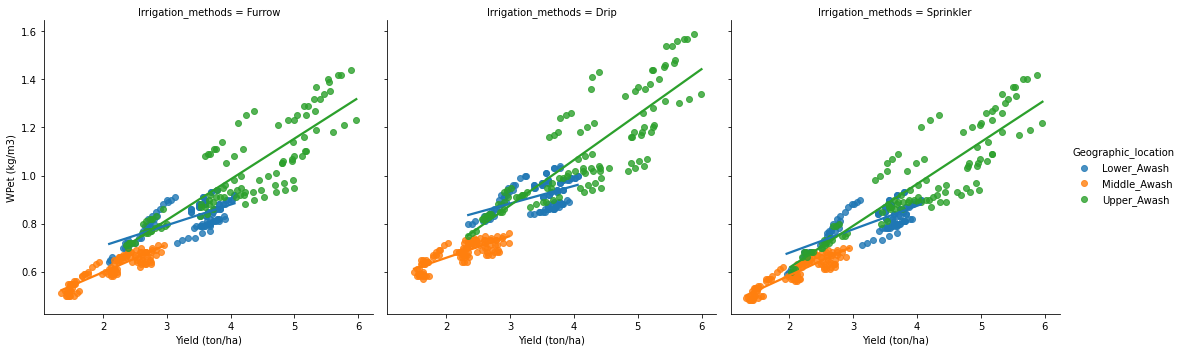

In [119]:
sns.lmplot(x="Yield (ton/ha)", y="WPet (kg/m3)", col="Irrigation_methods", ci=None, hue="Geographic_location", data=wheat);


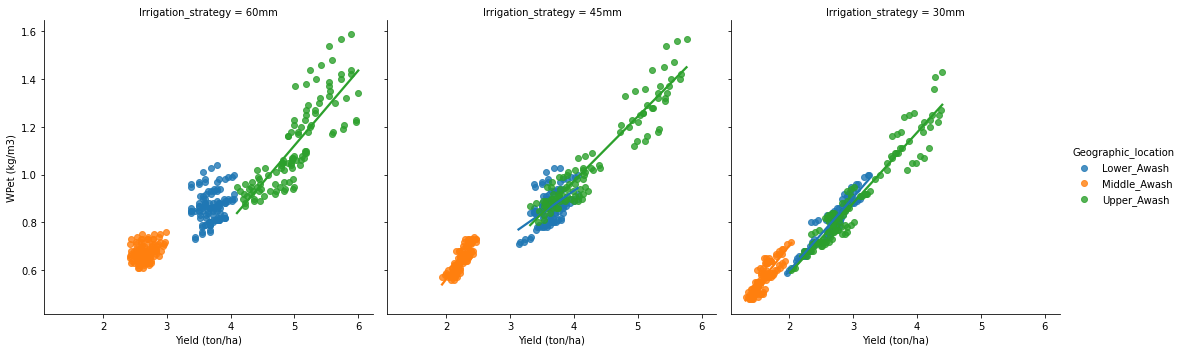

In [120]:
sns.lmplot(x="Yield (ton/ha)", y="WPet (kg/m3)", col="Irrigation_strategy", ci=None, hue="Geographic_location", data=wheat);


<AxesSubplot:xlabel='Geographic_location', ylabel='Yield (ton/ha)'>

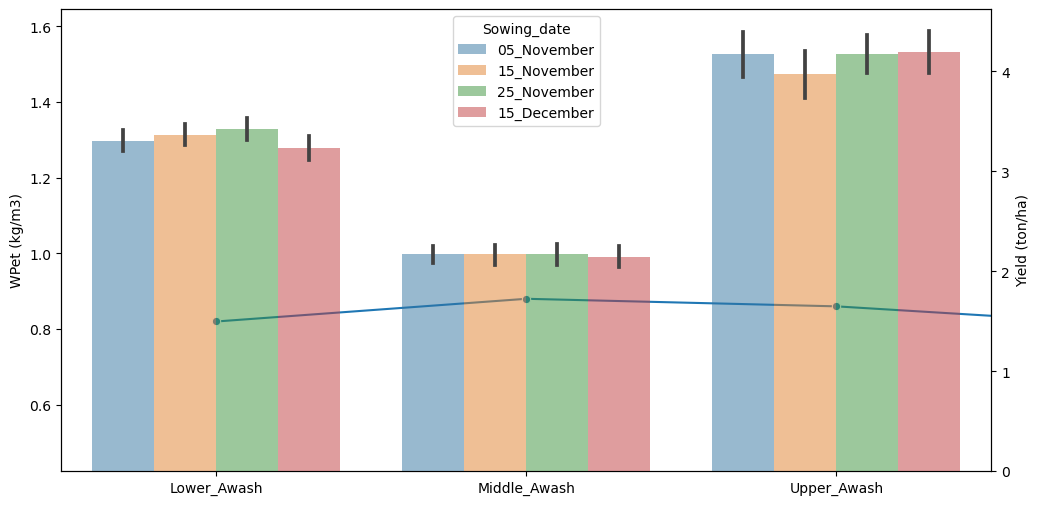

In [121]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = wheat['WPet (kg/m3)'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = wheat, x='Geographic_location', y='Yield (ton/ha)', hue='Sowing_date', alpha=0.5, ax=ax2)

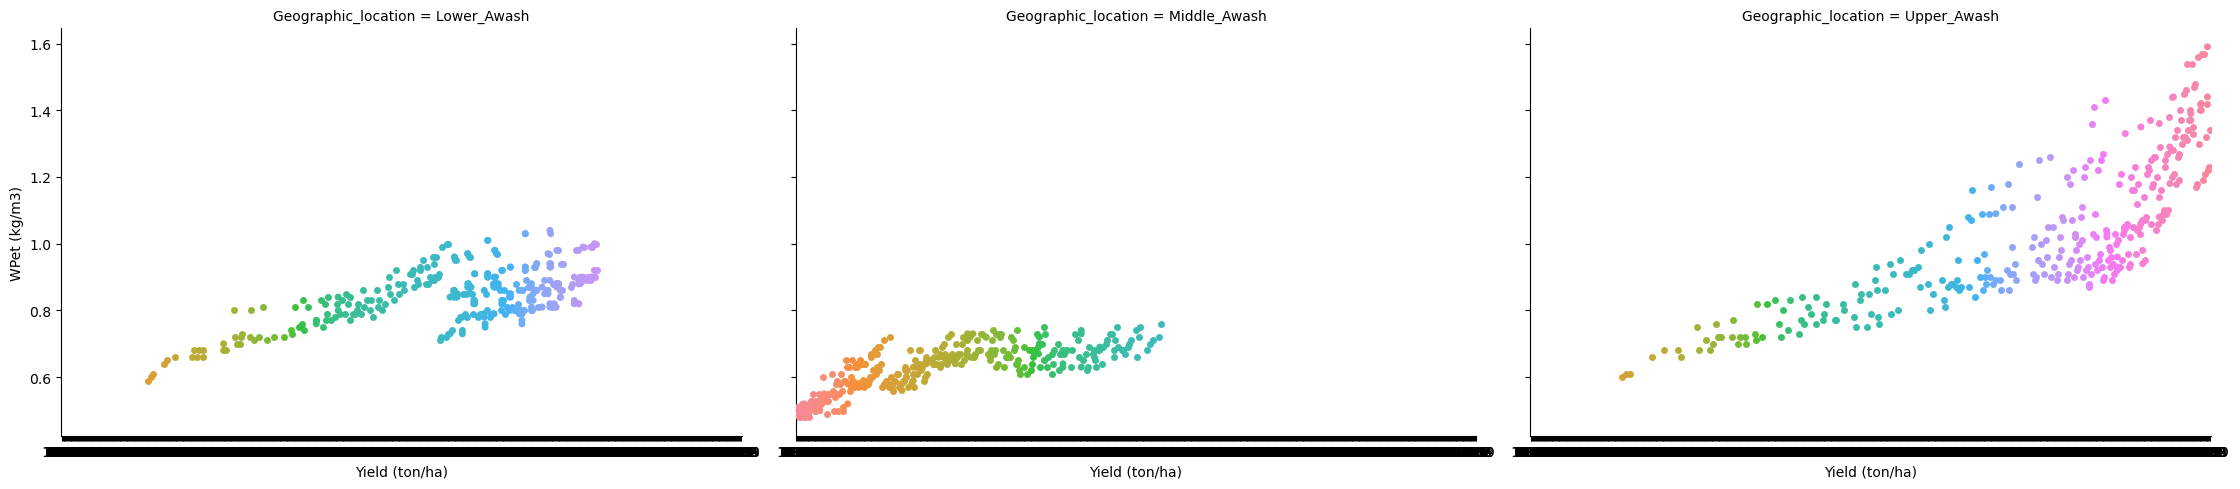

In [122]:
sns.catplot(data=wheat,x='Yield (ton/ha)',y='WPet (kg/m3)',col='Geographic_location', aspect=1.5)


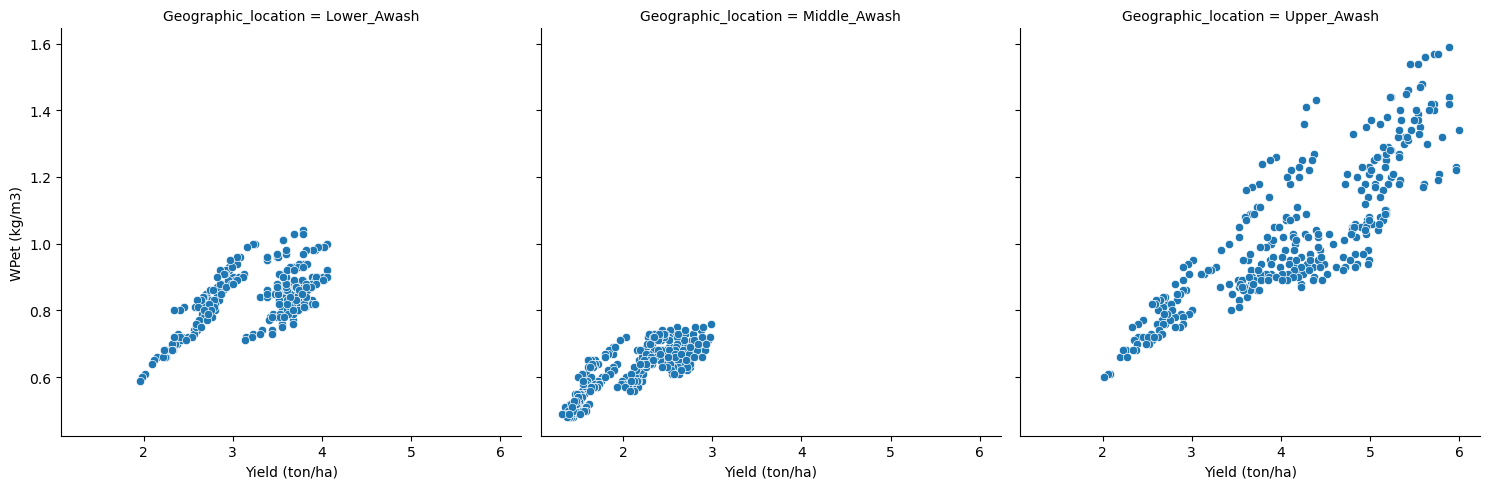

In [123]:
sns.relplot(data=wheat,x='Yield (ton/ha)',y='WPet (kg/m3)',col='Geographic_location')
plt.savefig('wpgy.png', dpi=2000)

NameError: name 'df1' is not defined

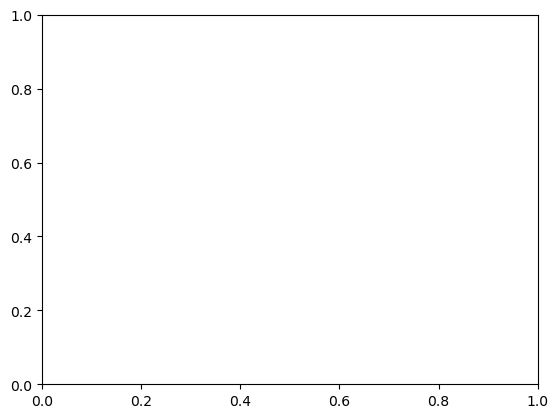

In [124]:
import matplotlib.pyplot as plt

#define colors to use
col1 = 'steelblue'
col2 = 'red'

#define subplots
fig,ax = plt.subplots()

#add first line to plot
ax.plot(df1.year, df1.sales, color=col1, marker='o', linewidth=3)

#add x-axis label
ax.set_xlabel('Year', fontsize=14)

#add y-axis label
ax.set_ylabel('Sales', color=col1, fontsize=16)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(df2.year, df2.leads, color=col2, marker='o', linewidth=3)

#add second y-axis label
ax2.set_ylabel('Leads', color=col2, fontsize=16)

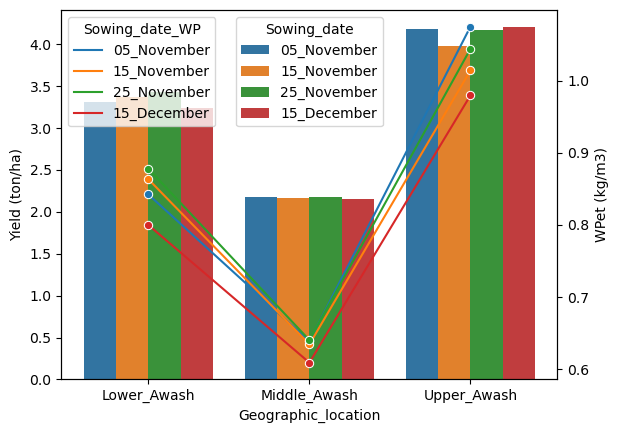

In [126]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots()

sns.barplot(data = wheat, x='Geographic_location',y='Yield (ton/ha)', hue='Sowing_date', ci=None, ax=ax1)
ax2 = ax1.twinx()

sns.lineplot(data = wheat, x='Geographic_location',y='WPet (kg/m3)', marker='o' , hue='Sowing_date', ci=None, ax=ax2)
plt.legend(title='Sowing_date_WP')

plt.savefig('Sowing.png', dpi=2000)


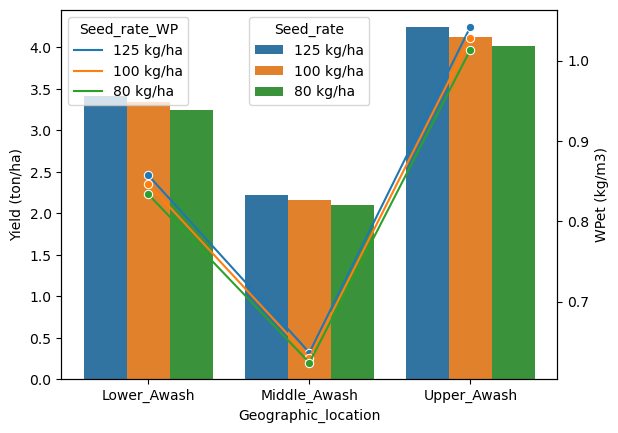

In [127]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots()

sns.barplot(data = wheat, x='Geographic_location',y='Yield (ton/ha)', hue='Seed_rate', ci=None, ax=ax1)
ax2 = ax1.twinx()

sns.lineplot(data = wheat, x='Geographic_location',y='WPet (kg/m3)', marker='o' , hue='Seed_rate', ci=None, ax=ax2)
plt.legend(title='Seed_rate_WP')

plt.savefig('Seed.png', dpi=2000)


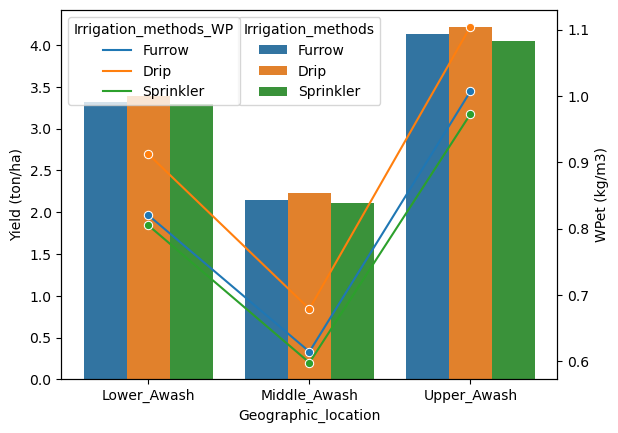

In [128]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots()

sns.barplot(data = wheat, x='Geographic_location',y='Yield (ton/ha)', hue='Irrigation_methods', ci=None, ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data = wheat, x='Geographic_location',y='WPet (kg/m3)', marker='o' , hue='Irrigation_methods', ci=None, ax=ax2)
plt.legend(title='Irrigation_methods_WP')

plt.savefig('IM.png', dpi=2000)


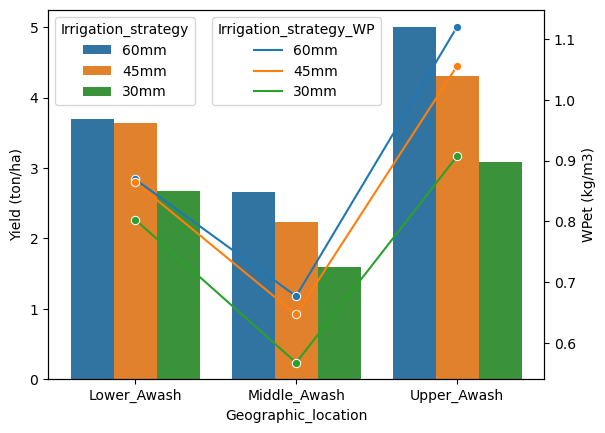

In [129]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots()

sns.barplot(data = wheat, x='Geographic_location',y='Yield (ton/ha)', hue='Irrigation_strategy', ci=None, ax=ax1)
ax2 = ax1.twinx()

sns.lineplot(data = wheat, x='Geographic_location',y='WPet (kg/m3)', marker='o' , hue='Irrigation_strategy', ci=None, ax=ax2)
plt.legend(title='Irrigation_strategy_WP', loc = 'upper center')
plt.savefig('IS.png', dpi=2000)
